# Medical Speech Transcription

### Project by Michele Waters

### Data sources

* Dataset on kaggle: https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent
* Original dataset: https://appen.com/datasets/audio-recording-and-transcription-for-medical-scenarios/

### EDA

In [2]:
import pandas as pd
from os import listdir

Data "overview" variables: 
* audio_clipping-	Indicates if the audio needs to be clipped
* audio_clipping:confidence-	Judgment agreement on the previous field
* background_noise_audible-	Indicates if the audio has background noise
* background_noise_audible:confidence-	Judgment agreement on the previous field
* overall_quality_of_the_audio-	Quality rating on the audio
* quiet_speaker-	Indicates if the audio has was provided by a quiet speaker
* quiet_speaker:confidence-	Judgment agreement on the previous field
* speaker_id-	Reference to the provider of the original recording
* file_download-	Reference URL to the downloadable audio file
* file_name-	Filename for the audio file

In [3]:
overview_df= pd.read_csv('overview-of-recordings.csv')

In [4]:
overview_df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [5]:
#Check for missing values
overview_df.isna().sum()

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [6]:
overview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null   object 
 11  prompt                        

In [7]:
overview_df.columns

Index(['audio_clipping', 'audio_clipping:confidence',
       'background_noise_audible', 'background_noise_audible:confidence',
       'overall_quality_of_the_audio', 'quiet_speaker',
       'quiet_speaker:confidence', 'speaker_id', 'file_download', 'file_name',
       'phrase', 'prompt', 'writer_id'],
      dtype='object')

In [8]:
len(overview_df.file_name.unique())

6661

In [9]:
file_names=overview_df.file_name.unique()
file_names[:5]

array(['1249120_43453425_58166571.wav', '1249120_43719934_43347848.wav',
       '1249120_43719934_53187202.wav', '1249120_31349958_55816195.wav',
       '1249120_43719934_82524191.wav'], dtype=object)

In [10]:
train_file_names=listdir('train')
len(train_file_names)

381

In [11]:
#Check that train files are in list
len(set(train_file_names).intersection(set(file_names)))

381

In [12]:
train_overview_df=overview_df[overview_df['file_name'].isin(train_file_names)]

In [13]:
train_overview_df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
10,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0000,44197979,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44197979_23991689.wav,I have a sharp pain in my lower stomach.,Stomach ache,14026697
13,no_clipping,0.6609,light_noise,0.3391,3.00,audible_speaker,0.6735,44174241,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44174241_12756709.wav,Don't cry,Joint pain,44118742
91,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0000,44197979,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44197979_109954671.wav,When I get out of bed in the morning my body f...,Body feels weak,1883056
125,no_clipping,1.0000,light_noise,0.6429,3.33,audible_speaker,1.0000,44246595,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44246595_34981278.wav,i have a great pain in my thorax from heart in...,Heart hurts,44066678
141,no_clipping,1.0000,light_noise,1.0000,4.00,audible_speaker,1.0000,44176037,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_44176037_93714115.wav,I have a hard muscle pain since i went to the gym,Muscle pain,44150058


In [14]:
overview_df.overall_quality_of_the_audio.describe()

count    6661.000000
mean        3.678268
std         0.378536
min         3.000000
25%         3.330000
50%         3.670000
75%         4.000000
max         5.000000
Name: overall_quality_of_the_audio, dtype: float64

In [15]:
train_overview_df.quiet_speaker.unique()

array(['audible_speaker'], dtype=object)

In [16]:
train_overview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 10 to 6593
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       381 non-null    object 
 1   audio_clipping:confidence            381 non-null    float64
 2   background_noise_audible             381 non-null    object 
 3   background_noise_audible:confidence  381 non-null    float64
 4   overall_quality_of_the_audio         381 non-null    float64
 5   quiet_speaker                        381 non-null    object 
 6   quiet_speaker:confidence             381 non-null    float64
 7   speaker_id                           381 non-null    int64  
 8   file_download                        381 non-null    object 
 9   file_name                            381 non-null    object 
 10  phrase                               381 non-null    object 
 11  prompt                        

In [17]:
train_overview_df.prompt.unique()

array(['Stomach ache', 'Joint pain', 'Body feels weak', 'Heart hurts',
       'Muscle pain', 'Shoulder pain', 'Ear ache', 'Open wound',
       'Blurry vision', 'Hard to breath', 'Internal pain', 'Acne',
       'Infected wound', 'Cough', 'Emotional pain', 'Skin issue',
       'Knee pain', 'Back pain', 'Head ache', 'Feeling dizzy',
       'Feeling cold', 'Neck pain', 'Hair falling out',
       'Injury from sports', 'Foot ache'], dtype=object)

In [18]:
len(train_overview_df.prompt.unique())

25

In [19]:
len(overview_df.prompt.unique())

25

<AxesSubplot:>

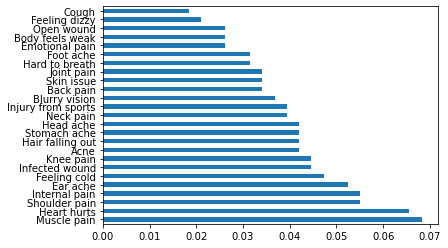

In [20]:
#Training data distribution
train_overview_df.prompt.value_counts('normalize').plot.barh()

<AxesSubplot:>

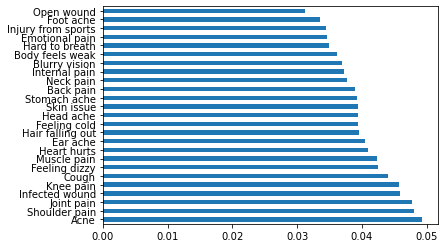

In [21]:
#Entire dataset distribution
overview_df.prompt.value_counts('normalize').plot.barh()

### Speech to Text

In [38]:
#Protocol Source: https://realpython.com/python-speech-recognition/
#Package Source: https://pypi.org/project/SpeechRecognition/
#!pip install SpeechRecognition

In [39]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [40]:
train_file_names[:5]

['1249120_44176037_58635902.wav',
 '1249120_44176037_96532055.wav',
 '1249120_44220382_41016711.wav',
 '1249120_44188922_16615356.wav',
 '1249120_44246595_60938320.wav']

In [41]:
list(train_overview_df.file_name.values[:5])

['1249120_44197979_23991689.wav',
 '1249120_44174241_12756709.wav',
 '1249120_44197979_109954671.wav',
 '1249120_44246595_34981278.wav',
 '1249120_44176037_93714115.wav']

In [42]:
#Convert speech to text
def speech_to_text(wav_file_names):
    speech_text=[]
    for wav_file in wav_file_names[:5]:
        r = sr.Recognizer()
        file = sr.AudioFile('train/'+wav_file)
        with file as source:
            audio = r.record(source)
        try:
            speech_text.append(r.recognize_google(audio, language='en-IN', show_all=False))
        except:
            speech_text.append('')
    return speech_text

In [43]:
speech_text=speech_to_text(wav_file_names=train_overview_df.file_name)

In [44]:
speech_text

['I have a sharp pain in my nose',
 '',
 'when I get out of bed in the morning my body feels very weak',
 'Great Pyrenees thorax from heart injury',
 'I have a hard muscle pain since I went to the gym']

In [45]:
train_overview_df.phrase[:5].values

array(['I have a sharp pain in my lower stomach.', "Don't cry",
       'When I get out of bed in the morning my body feels very weak.',
       'i have a great pain in my thorax from heart injury',
       'I have a hard muscle pain since i went to the gym'], dtype=object)

### Verify Audio

* Since there seems to be a bit of discrepancy between the audio of the first training file (i.e. train_overview_df.phrase[0]= 'I have a sharp pain in my lower stomach.' does not match what we hear in the audio 'I have a sharp pain in my lower'), we should make sure the audio in the training data matches with the 'phrase' description in train_overview_df, and remove the training data where the audio doesn't match the description.

In [36]:
#!pip install playsound

In [50]:
from playsound import playsound

In [51]:
train_overview_df.index

Int64Index([  10,   13,   91,  125,  141,  153,  154,  491,  492,  493,
            ...
            6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593],
           dtype='int64', length=381)

In [56]:
train_overview_df.loc[10]

audio_clipping                                                               no_clipping
audio_clipping:confidence                                                              1
background_noise_audible                                                     light_noise
background_noise_audible:confidence                                                    1
overall_quality_of_the_audio                                                        3.33
quiet_speaker                                                            audible_speaker
quiet_speaker:confidence                                                               1
speaker_id                                                                      44197979
file_download                          https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...
file_name                                                  1249120_44197979_23991689.wav
phrase                                          I have a sharp pain in my lower stomach.
prompt               

In [64]:
def verify_audio(df=train_overview_df):
    audio_matches=[]
    for i in df.index:
        print(df.loc[i].phrase)
        playsound('train/'+df.loc[i].file_name)
        match=input("Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):")
        if match=='r':
            while match=='r':
                playsound('train/'+df.loc[i].file_name)
                match=input("Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):")
        audio_matches.append(match)
    return audio_matches

In [66]:
audio_matches=verify_audio(df=train_overview_df[:3])

I have a sharp pain in my lower stomach.
Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):0
Don't cry
Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):r
Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):0
When I get out of bed in the morning my body feels very weak.
Enter '1' if audio matches; enter '0' if audio does not match. (Enter 'r' to replay audio):1


In [67]:
audio_matches

['0', '0', '1']